In [23]:
import numpy as np
np.random.seed(108)

from math import sqrt

import keras
from keras.datasets import mnist
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout, BatchNormalization, Activation
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11264000/11490434 [============================>.] - ETA: 0s

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [4]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [5]:
def model_2ccn_dropout():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), strides=1, input_shape = (28,28,1), activation='relu'))
    model.add(Dropout(.5))
    # model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=2))
    model.add(Conv2D(64, kernel_size=(3,3), strides=1, activation='relu'))
    model.add(Dropout(.5))
    # model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(512,activation="relu"))
    model.add(Dense(10,activation="softmax"))

    print(model.summary())
    return model

In [6]:
def model_2ccn_bn():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), strides=1, input_shape = (28,28,1), activation='relu'))
    #model.add(Dropout(.5))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=2))
    model.add(Conv2D(64, kernel_size=(3,3), strides=1, activation='relu'))
    #model.add(Dropout(.5))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(512,activation="relu"))
    model.add(Dense(10,activation="softmax"))

    print(model.summary())
    return model

In [7]:
models = {'model1' : model_2ccn_dropout(),
         'model2' : model_2ccn_bn()}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 38s - loss: 0.0266 - acc: 0.9914 - val_loss: 0.0439 - val_acc: 0.9907
Epoch 2/20
60000/60000 [==============================] - 38s - loss: 0.0233 - acc: 0.9922 - val_loss: 0.0389 - val_acc: 0.9919
Epoch 3/20
60000/60000 [==============================] - 36s - loss: 0.0203 - acc: 0.9934 - val_loss: 0.0337 - val_acc: 0.9928
Epoch 4/20
60000/60000 [==============================] - 35s - loss: 0.0173 - acc: 0.9943 - val_loss: 0.0339 - val_acc: 0.9914
Epoch 5/20
60000/60000 [==============================] - 35s - loss: 0.0177 - acc: 0.9941 - val_loss: 0.0319 - val_acc: 0.9921
Epoch 6/20
60000/60000 [==============================] - 35s - loss: 0.0164 - acc: 0.9948 - val_loss: 0.0301 - val_acc: 0.9921
Epoch 7/20
60000/60000 [==============================] - 35s - loss: 0.0158 - acc: 0.9950 - val_loss: 0.0401 - val_acc: 0.9906
Epoch 8/20
60000/60000 [==============================

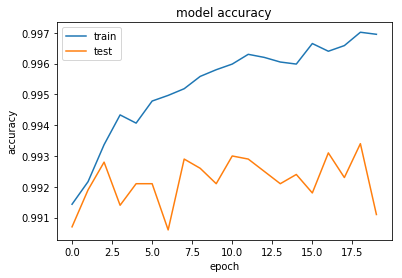

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 64s - loss: 0.1070 - acc: 0.9683 - val_loss: 0.0588 - val_acc: 0.9819
Epoch 2/20
60000/60000 [==============================] - 58s - loss: 0.0423 - acc: 0.9872 - val_loss: 0.0477 - val_acc: 0.9863
Epoch 3/20
60000/60000 [==============================] - 58s - loss: 0.0289 - acc: 0.9912 - val_loss: 0.0409 - val_acc: 0.9889
Epoch 4/20
60000/60000 [==============================] - 58s - loss: 0.0237 - acc: 0.9930 - val_loss: 0.0551 - val_acc: 0.9874
Epoch 5/20
60000/60000 [==============================] - 58s - loss: 0.0197 - acc: 0.9941 - val_loss: 0.0619 - val_acc: 0.9857
Epoch 6/20
60000/60000 [==============================] - 58s - loss: 0.0194 - acc: 0.9945 - val_loss: 0.0528 - val_acc: 0.9879
Epoch 7/20
60000/60000 [==============================] - 59s - loss: 0.0141 - acc: 0.9959 - val_loss: 0.0529 - val_acc: 0.9903
Epoch 8/20
60000/60000 [==============================

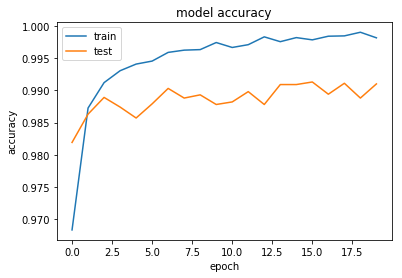

In [9]:
for model in models:
    models[model].compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = models[model].fit(X_train, y_train, batch_size=64, 
          verbose=1, epochs=20, validation_data=(X_test, y_test))

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

# Data preprocessing

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 35s - loss: 0.0215 - acc: 0.9944 - val_loss: 0.0257 - val_acc: 0.9925
Epoch 2/20
60000/60000 [==============================] - 35s - loss: 0.0128 - acc: 0.9968 - val_loss: 0.0267 - val_acc: 0.9922
Epoch 3/20
60000/60000 [==============================] - 35s - loss: 0.0081 - acc: 0.9974 - val_loss: 0.0248 - val_acc: 0.9927
Epoch 4/20
60000/60000 [==============================] - 35s - loss: 0.0119 - acc: 0.9968 - val_loss: 0.0236 - val_acc: 0.9932
Epoch 5/20
60000/60000 [==============================] - 35s - loss: 0.0095 - acc: 0.9971 - val_loss: 0.0292 - val_acc: 0.9920
Epoch 6/20
60000/60000 [==============================] - 35s - loss: 0.0081 - acc: 0.9974 - val_loss: 0.0234 - val_acc: 0.9940
Epoch 7/20
60000/60000 [==============================] - 35s - loss: 0.0099 - acc: 0.9973 - val_loss: 0.0227 - val_acc: 0.9929
Epoch 8/20
60000/60000 [==============================

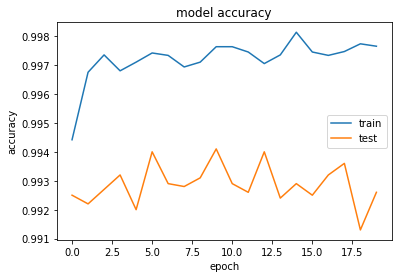

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 58s - loss: 0.0101 - acc: 0.9974 - val_loss: 0.0744 - val_acc: 0.9890
Epoch 2/20
60000/60000 [==============================] - 58s - loss: 0.0098 - acc: 0.9980 - val_loss: 0.0574 - val_acc: 0.9917
Epoch 3/20
60000/60000 [==============================] - 58s - loss: 0.0064 - acc: 0.9987 - val_loss: 0.0703 - val_acc: 0.9892
Epoch 4/20
60000/60000 [==============================] - 58s - loss: 0.0089 - acc: 0.9981 - val_loss: 0.1119 - val_acc: 0.9852
Epoch 5/20
60000/60000 [==============================] - 58s - loss: 0.0081 - acc: 0.9985 - val_loss: 0.0771 - val_acc: 0.9901
Epoch 6/20
60000/60000 [==============================] - 58s - loss: 0.0046 - acc: 0.9991 - val_loss: 0.0770 - val_acc: 0.9904
Epoch 7/20
60000/60000 [==============================] - 58s - loss: 0.0046 - acc: 0.9990 - val_loss: 0.0659 - val_acc: 0.9911
Epoch 8/20
60000/60000 [==============================

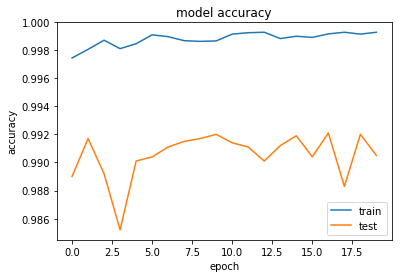

In [10]:
X_train_centered = X_train.copy()
X_train_centered -= np.mean(X_train, axis = 0)
X_test_centered = X_test.copy()
X_test_centered -= np.mean(X_test, axis = 0)

for model in models:
    models[model].compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = models[model].fit(X_train_centered, y_train, batch_size=64, 
          verbose=1, epochs=20, validation_data=(X_test_centered, y_test))

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

# Data augmentation

Epoch 1/20
938/937 [==============================] - 37s - loss: 2.3442 - acc: 0.1120 - val_loss: 1.7858 - val_acc: 0.7794
Epoch 2/20
938/937 [==============================] - 37s - loss: 2.2844 - acc: 0.1237 - val_loss: 1.2496 - val_acc: 0.8710
Epoch 3/20
938/937 [==============================] - 37s - loss: 2.2704 - acc: 0.1282 - val_loss: 0.8942 - val_acc: 0.8908
Epoch 4/20
938/937 [==============================] - 37s - loss: 2.2576 - acc: 0.1332 - val_loss: 0.6818 - val_acc: 0.9283
Epoch 5/20
938/937 [==============================] - 37s - loss: 2.2460 - acc: 0.1388 - val_loss: 0.6296 - val_acc: 0.9329
Epoch 6/20
938/937 [==============================] - 37s - loss: 2.2366 - acc: 0.1421 - val_loss: 0.4157 - val_acc: 0.9400
Epoch 7/20
938/937 [==============================] - 37s - loss: 2.2283 - acc: 0.1446 - val_loss: 0.3625 - val_acc: 0.9460
Epoch 8/20
938/937 [==============================] - 37s - loss: 2.2238 - acc: 0.1453 - val_loss: 0.3574 - val_acc: 0.9336
Epoch 9/

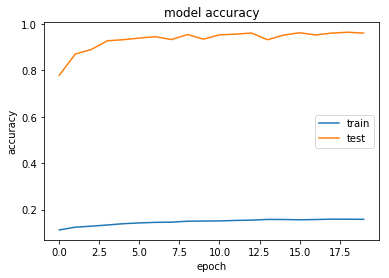

Epoch 1/20
938/937 [==============================] - 60s - loss: 3.7526 - acc: 0.1104 - val_loss: 0.5006 - val_acc: 0.9608
Epoch 2/20
938/937 [==============================] - 60s - loss: 3.2760 - acc: 0.1221 - val_loss: 2.1347 - val_acc: 0.2598
Epoch 3/20
938/937 [==============================] - 60s - loss: 2.3086 - acc: 0.1137 - val_loss: 2.1086 - val_acc: 0.2042
Epoch 4/20
938/937 [==============================] - 60s - loss: 2.2903 - acc: 0.1202 - val_loss: 1.8824 - val_acc: 0.2627
Epoch 5/20
938/937 [==============================] - 60s - loss: 2.2785 - acc: 0.1239 - val_loss: 1.9229 - val_acc: 0.2561
Epoch 6/20
938/937 [==============================] - 60s - loss: 2.2724 - acc: 0.1265 - val_loss: 1.7965 - val_acc: 0.3300
Epoch 7/20
938/937 [==============================] - 59s - loss: 2.2671 - acc: 0.1282 - val_loss: 1.6876 - val_acc: 0.3268
Epoch 8/20
938/937 [==============================] - 59s - loss: 2.2617 - acc: 0.1308 - val_loss: 1.4070 - val_acc: 0.4679
Epoch 9/

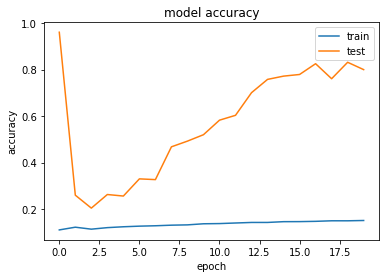

In [11]:
datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=2,
            height_shift_range=2,
)

for model in models:
    models[model].compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = models[model].fit_generator(datagen.flow(X_train, y_train, batch_size=64),
                    steps_per_epoch=len(X_train) / 64,
                    verbose=1, epochs=20, validation_data=(X_test, y_test))

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

# Data preprocessing and augmentation

Epoch 1/20
938/937 [==============================] - 37s - loss: 2.2150 - acc: 0.1501 - val_loss: 0.3184 - val_acc: 0.9566
Epoch 2/20
938/937 [==============================] - 37s - loss: 2.1956 - acc: 0.1587 - val_loss: 0.3242 - val_acc: 0.9498
Epoch 3/20
938/937 [==============================] - 37s - loss: 2.1858 - acc: 0.1624 - val_loss: 0.2755 - val_acc: 0.9564
Epoch 4/20
938/937 [==============================] - 37s - loss: 2.1793 - acc: 0.1643 - val_loss: 0.1756 - val_acc: 0.9678
Epoch 5/20
938/937 [==============================] - 37s - loss: 2.1733 - acc: 0.1679 - val_loss: 0.1993 - val_acc: 0.9631
Epoch 6/20
938/937 [==============================] - 37s - loss: 2.1714 - acc: 0.1677 - val_loss: 0.2272 - val_acc: 0.9565
Epoch 7/20
938/937 [==============================] - 37s - loss: 2.1726 - acc: 0.1679 - val_loss: 0.3087 - val_acc: 0.9562
Epoch 8/20
938/937 [==============================] - 37s - loss: 2.1711 - acc: 0.1686 - val_loss: 0.2638 - val_acc: 0.9550
Epoch 9/

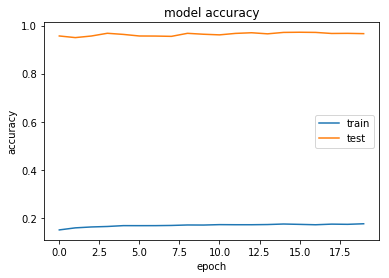

Epoch 1/20
938/937 [==============================] - 60s - loss: 2.2364 - acc: 0.1432 - val_loss: 0.7459 - val_acc: 0.7576
Epoch 2/20
938/937 [==============================] - 60s - loss: 2.2132 - acc: 0.1516 - val_loss: 0.6009 - val_acc: 0.8129
Epoch 3/20
938/937 [==============================] - 60s - loss: 2.2020 - acc: 0.1569 - val_loss: 0.5156 - val_acc: 0.8377
Epoch 4/20
938/937 [==============================] - 60s - loss: 2.1943 - acc: 0.1613 - val_loss: 0.5186 - val_acc: 0.8580
Epoch 5/20
938/937 [==============================] - 60s - loss: 2.1940 - acc: 0.1602 - val_loss: 0.5176 - val_acc: 0.8532
Epoch 6/20
938/937 [==============================] - 60s - loss: 2.1878 - acc: 0.1626 - val_loss: 0.4165 - val_acc: 0.8659
Epoch 7/20
938/937 [==============================] - 60s - loss: 2.1804 - acc: 0.1652 - val_loss: 0.4416 - val_acc: 0.8601
Epoch 8/20
938/937 [==============================] - 60s - loss: 2.1758 - acc: 0.1670 - val_loss: 0.3570 - val_acc: 0.8911
Epoch 9/

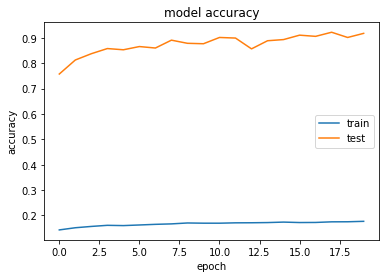

In [12]:
datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=2,
            height_shift_range=2,
)

for model in models:
    models[model].compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = models[model].fit_generator(datagen.flow(X_train_centered, y_train, batch_size=64),
                    steps_per_epoch=len(X_train_centered) / 64,
                    verbose=1, epochs=20, validation_data=(X_test_centered, y_test))

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

# change in optimizer

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 35s - loss: 0.0657 - acc: 0.9797 - val_loss: 0.0768 - val_acc: 0.9900
Epoch 2/20
60000/60000 [==============================] - 36s - loss: 0.0378 - acc: 0.9890 - val_loss: 0.0626 - val_acc: 0.9910
Epoch 3/20
60000/60000 [==============================] - 36s - loss: 0.0261 - acc: 0.9922 - val_loss: 0.0584 - val_acc: 0.9902
Epoch 4/20
60000/60000 [==============================] - 35s - loss: 0.0195 - acc: 0.9940 - val_loss: 0.0382 - val_acc: 0.9921
Epoch 5/20
60000/60000 [==============================] - 36s - loss: 0.0173 - acc: 0.9947 - val_loss: 0.0474 - val_acc: 0.9916
Epoch 6/20
60000/60000 [==============================] - 35s - loss: 0.0146 - acc: 0.9956 - val_loss: 0.0253 - val_acc: 0.9926
Epoch 7/20
60000/60000 [==============================] - 35s - loss: 0.0109 - acc: 0.9965 - val_loss: 0.0289 - val_acc: 0.9924
Epoch 8/20
60000/60000 [==============================

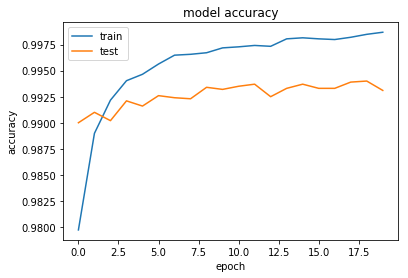

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 59s - loss: 0.1298 - acc: 0.9647 - val_loss: 0.0603 - val_acc: 0.9812
Epoch 2/20
60000/60000 [==============================] - 59s - loss: 0.0561 - acc: 0.9829 - val_loss: 0.0460 - val_acc: 0.9837
Epoch 3/20
60000/60000 [==============================] - 58s - loss: 0.0441 - acc: 0.9866 - val_loss: 0.0406 - val_acc: 0.9854
Epoch 4/20
60000/60000 [==============================] - 58s - loss: 0.0368 - acc: 0.9884 - val_loss: 0.0382 - val_acc: 0.9870
Epoch 5/20
60000/60000 [==============================] - 58s - loss: 0.0326 - acc: 0.9901 - val_loss: 0.0355 - val_acc: 0.9873
Epoch 6/20
60000/60000 [==============================] - 58s - loss: 0.0279 - acc: 0.9915 - val_loss: 0.0370 - val_acc: 0.9868
Epoch 7/20
60000/60000 [==============================] - 58s - loss: 0.0251 - acc: 0.9925 - val_loss: 0.0349 - val_acc: 0.9871
Epoch 8/20
60000/60000 [==============================

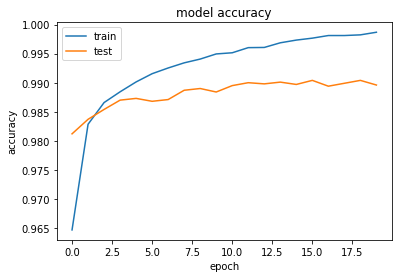

In [17]:
from keras.optimizers import Adam
epochs = 20
lr = 1e-3
decay = lr/sqrt(epochs)
optimizer = Adam(lr=lr, decay=decay)

for model in models:
    models[model].compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = models[model].fit(X_train, y_train, batch_size=64, 
          verbose=1, epochs=epochs, validation_data=(X_test, y_test))

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

# Higher learning rate in batchnormalization

In [25]:
from keras.optimizers import Adam
epochs = 30
lr = 1e-2
decay = lr/sqrt(epochs)
optimizer = Adam(lr=lr, decay=decay)

model = model_2ccn_init()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
history = model.fit(X_train, y_train, batch_size=64, 
          verbose=1, epochs=epochs, validation_data=(X_test, y_test))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 64)        0         
__________

KeyboardInterrupt: 

# All hands on board

In [26]:
def model_2ccn_init():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), strides=1, input_shape = (28,28,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2))
    model.add(Conv2D(64, kernel_size=(3,3), strides=1))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(.5))
    model.add(Dense(10,activation="softmax"))

    print(model.summary())
    return model

In [28]:
epochs = 50
lr = 1e-2
decay = lr/sqrt(epochs)
optimizer = Adam(lr=lr, decay=decay)

model = model_2ccn_init()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
history = model.fit_generator(datagen.flow(X_train_centered, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32,
                    verbose=1, epochs=epochs, validation_data=(X_test_centered, y_test))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
activation_5 (Activation)    (None, 11, 11, 64)        0         
__________

KeyboardInterrupt: 

In [ ]:
from keras.optimizers import Adam
epochs = 50
lr = 1e-2
decay = lr/sqrt(epochs)
optimizer = Adam(lr=lr, decay=decay)

model = model_2ccn_init()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
history = model.fit(X_train_centered, y_train, batch_size=32, 
          verbose=1, epochs=epochs, validation_data=(X_test_centered, y_test))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [50]:
mlps = [512, 1028]
learning_rates = [1e-2, 5e-3, 1e-3]
training_sets = [X_train, X_train_centered]
test_sets = [X_test, X_test_centered]
training_set_names = ["normal", "centered"]

MLP size:  512  | Learning rate:  0.01  | Training set: normal
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 72s - loss: 0.1307 - acc: 0.9609 - val_loss: 0.0292 - val_acc: 0.9909
Epoch 2/50
60000/60000 [==============================] - 69s - loss: 0.0487 - acc: 0.9849 - val_loss: 0.0224 - val_acc: 0.9928
Epoch 3/50
60000/60000 [==============================] - 69s - loss: 0.0328 - acc: 0.9900 - val_loss: 0.0220 - val_acc: 0.9933
Epoch 4/50
60000/60000 [==============================] - 69s - loss: 0.0253 - acc: 0.9920 - val_loss: 0.0207 - val_acc: 0.9934
Epoch 5/50
60000/60000 [==============================] - 69s - loss: 0.0180 - acc: 0.9943 - val_loss: 0.0189 - val_acc: 0.9936
Epoch 6/50
60000/60000 [==============================] - 69s - loss: 0.0144 - acc: 0.9955 - val_loss: 0.0226 - val_acc: 0.9932
Epoch 7/50
60000/60000 [==============================] - 69s - loss: 0.0131 - acc: 0.9960 - val_loss: 0.0221 - val_acc

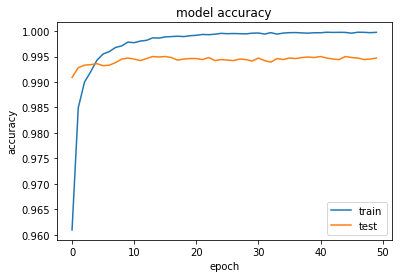

 9920/10000 [============================>.] - ETA: 0sMLP size:  512  | Learning rate:  0.01  | Training set: centered
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 70s - loss: 0.1335 - acc: 0.9605 - val_loss: 0.0315 - val_acc: 0.9897
Epoch 2/50
60000/60000 [==============================] - 69s - loss: 0.0498 - acc: 0.9842 - val_loss: 0.0230 - val_acc: 0.9922
Epoch 3/50
60000/60000 [==============================] - 69s - loss: 0.0347 - acc: 0.9890 - val_loss: 0.0165 - val_acc: 0.9936
Epoch 4/50
60000/60000 [==============================] - 69s - loss: 0.0251 - acc: 0.9917 - val_loss: 0.0184 - val_acc: 0.9937
Epoch 5/50
60000/60000 [==============================] - 69s - loss: 0.0189 - acc: 0.9940 - val_loss: 0.0190 - val_acc: 0.9937
Epoch 6/50
60000/60000 [==============================] - 69s - loss: 0.0147 - acc: 0.9957 - val_loss: 0.0170 - val_acc: 0.9948
Epoch 7/50
60000/60000 [==============================] - 69s -

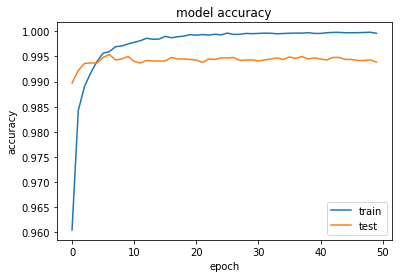

 9984/10000 [============================>.] - ETA: 0sMLP size:  512  | Learning rate:  0.005  | Training set: normal
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 70s - loss: 0.1199 - acc: 0.9643 - val_loss: 0.0350 - val_acc: 0.9881
Epoch 2/50
60000/60000 [==============================] - 69s - loss: 0.0505 - acc: 0.9841 - val_loss: 0.0289 - val_acc: 0.9905
Epoch 3/50
60000/60000 [==============================] - 69s - loss: 0.0356 - acc: 0.9890 - val_loss: 0.0221 - val_acc: 0.9928
Epoch 4/50
60000/60000 [==============================] - 69s - loss: 0.0254 - acc: 0.9920 - val_loss: 0.0205 - val_acc: 0.9927
Epoch 5/50
60000/60000 [==============================] - 69s - loss: 0.0192 - acc: 0.9941 - val_loss: 0.0167 - val_acc: 0.9948
Epoch 6/50
60000/60000 [==============================] - 69s - loss: 0.0148 - acc: 0.9951 - val_loss: 0.0180 - val_acc: 0.9943
Epoch 7/50
60000/60000 [==============================] - 69s - 

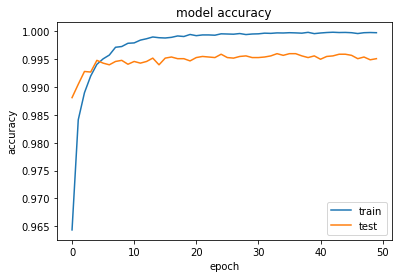

 9952/10000 [============================>.] - ETA: 0sMLP size:  512  | Learning rate:  0.005  | Training set: centered
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 70s - loss: 0.1214 - acc: 0.9632 - val_loss: 0.0355 - val_acc: 0.9884
Epoch 2/50
60000/60000 [==============================] - 69s - loss: 0.0493 - acc: 0.9846 - val_loss: 0.0271 - val_acc: 0.9909
Epoch 3/50
60000/60000 [==============================] - 69s - loss: 0.0362 - acc: 0.9886 - val_loss: 0.0205 - val_acc: 0.9926
Epoch 4/50
60000/60000 [==============================] - 69s - loss: 0.0232 - acc: 0.9925 - val_loss: 0.0189 - val_acc: 0.9935
Epoch 5/50
60000/60000 [==============================] - 69s - loss: 0.0192 - acc: 0.9939 - val_loss: 0.0190 - val_acc: 0.9936
Epoch 6/50
60000/60000 [==============================] - 69s - loss: 0.0166 - acc: 0.9945 - val_loss: 0.0170 - val_acc: 0.9942
Epoch 7/50
60000/60000 [==============================] - 69s 

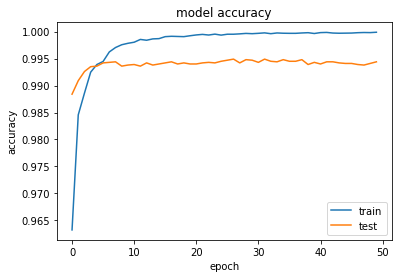

 9952/10000 [============================>.] - ETA: 0sMLP size:  512  | Learning rate:  0.001  | Training set: normal
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 71s - loss: 0.1096 - acc: 0.9668 - val_loss: 0.0837 - val_acc: 0.9742
Epoch 2/50
60000/60000 [==============================] - 69s - loss: 0.0507 - acc: 0.9843 - val_loss: 0.0259 - val_acc: 0.9915
Epoch 3/50
60000/60000 [==============================] - 69s - loss: 0.0385 - acc: 0.9874 - val_loss: 0.0241 - val_acc: 0.9914
Epoch 4/50
60000/60000 [==============================] - 69s - loss: 0.0284 - acc: 0.9911 - val_loss: 0.0227 - val_acc: 0.9915
Epoch 5/50
60000/60000 [==============================] - 69s - loss: 0.0217 - acc: 0.9929 - val_loss: 0.0222 - val_acc: 0.9929
Epoch 6/50
60000/60000 [==============================] - 69s - loss: 0.0175 - acc: 0.9945 - val_loss: 0.0212 - val_acc: 0.9935
Epoch 7/50
60000/60000 [==============================] - 69s - 

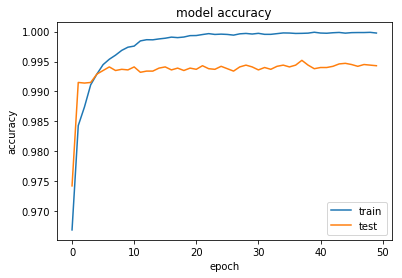

 9984/10000 [============================>.] - ETA: 0sMLP size:  512  | Learning rate:  0.001  | Training set: centered
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 71s - loss: 0.1128 - acc: 0.9652 - val_loss: 0.0455 - val_acc: 0.9858
Epoch 2/50
60000/60000 [==============================] - 69s - loss: 0.0519 - acc: 0.9834 - val_loss: 0.0322 - val_acc: 0.9893
Epoch 3/50
60000/60000 [==============================] - 69s - loss: 0.0398 - acc: 0.9870 - val_loss: 0.0293 - val_acc: 0.9895
Epoch 4/50
60000/60000 [==============================] - 69s - loss: 0.0282 - acc: 0.9908 - val_loss: 0.0254 - val_acc: 0.9913
Epoch 5/50
60000/60000 [==============================] - 69s - loss: 0.0238 - acc: 0.9920 - val_loss: 0.0219 - val_acc: 0.9930
Epoch 6/50
60000/60000 [==============================] - 69s - loss: 0.0188 - acc: 0.9941 - val_loss: 0.0231 - val_acc: 0.9927
Epoch 7/50
60000/60000 [==============================] - 69s 

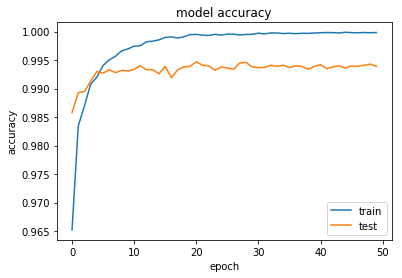

 9888/10000 [============================>.] - ETA: 0sMLP size:  1028  | Learning rate:  0.01  | Training set: normal
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 91s - loss: 0.1598 - acc: 0.9593 - val_loss: 0.0341 - val_acc: 0.9894
Epoch 2/50
60000/60000 [==============================] - 89s - loss: 0.0541 - acc: 0.9834 - val_loss: 0.0318 - val_acc: 0.9900
Epoch 3/50
60000/60000 [==============================] - 89s - loss: 0.0335 - acc: 0.9895 - val_loss: 0.0211 - val_acc: 0.9931
Epoch 4/50
60000/60000 [==============================] - 89s - loss: 0.0259 - acc: 0.9921 - val_loss: 0.0212 - val_acc: 0.9934
Epoch 5/50
60000/60000 [==============================] - 89s - loss: 0.0194 - acc: 0.9941 - val_loss: 0.0203 - val_acc: 0.9935
Epoch 6/50
60000/60000 [==============================] - 89s - loss: 0.0142 - acc: 0.9957 - val_loss: 0.0212 - val_acc: 0.9934
Epoch 7/50
60000/60000 [==============================] - 89s - 

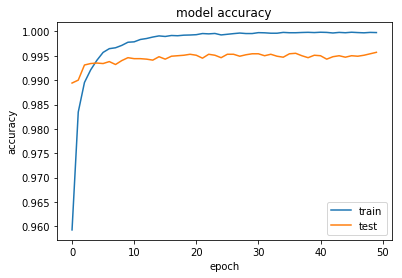

 9888/10000 [============================>.] - ETA: 0sMLP size:  1028  | Learning rate:  0.01  | Training set: centered
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 91s - loss: 0.1654 - acc: 0.9576 - val_loss: 0.0326 - val_acc: 0.9903
Epoch 2/50
60000/60000 [==============================] - 89s - loss: 0.0553 - acc: 0.9837 - val_loss: 0.0261 - val_acc: 0.9909
Epoch 3/50
60000/60000 [==============================] - 89s - loss: 0.0351 - acc: 0.9895 - val_loss: 0.0249 - val_acc: 0.9916
Epoch 4/50
60000/60000 [==============================] - 89s - loss: 0.0234 - acc: 0.9926 - val_loss: 0.0193 - val_acc: 0.9936
Epoch 5/50
60000/60000 [==============================] - 89s - loss: 0.0168 - acc: 0.9945 - val_loss: 0.0248 - val_acc: 0.9933
Epoch 6/50
60000/60000 [==============================] - 89s - loss: 0.0136 - acc: 0.9954 - val_loss: 0.0234 - val_acc: 0.9931
Epoch 7/50
60000/60000 [==============================] - 89s 

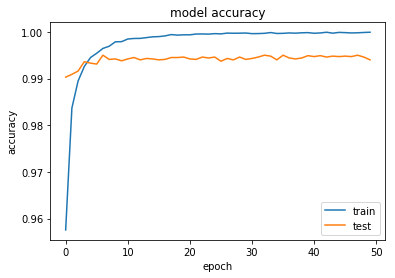

 9952/10000 [============================>.] - ETA: 0sMLP size:  1028  | Learning rate:  0.005  | Training set: normal
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 91s - loss: 0.1424 - acc: 0.9599 - val_loss: 0.0309 - val_acc: 0.9898
Epoch 2/50
60000/60000 [==============================] - 90s - loss: 0.0541 - acc: 0.9841 - val_loss: 0.0356 - val_acc: 0.9898
Epoch 3/50
60000/60000 [==============================] - 90s - loss: 0.0367 - acc: 0.9888 - val_loss: 0.0245 - val_acc: 0.9921
Epoch 4/50
60000/60000 [==============================] - 90s - loss: 0.0257 - acc: 0.9918 - val_loss: 0.0256 - val_acc: 0.9929
Epoch 5/50
60000/60000 [==============================] - 90s - loss: 0.0184 - acc: 0.9938 - val_loss: 0.0259 - val_acc: 0.9917
Epoch 6/50
60000/60000 [==============================] - 90s - loss: 0.0151 - acc: 0.9949 - val_loss: 0.0197 - val_acc: 0.9938
Epoch 7/50
60000/60000 [==============================] - 90s -

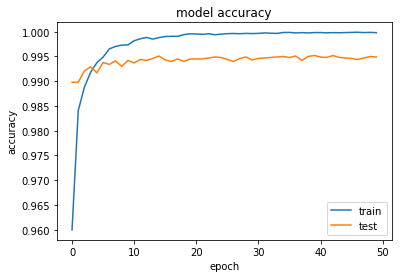

 9888/10000 [============================>.] - ETA: 0sMLP size:  1028  | Learning rate:  0.005  | Training set: centered
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 91s - loss: 0.1439 - acc: 0.9604 - val_loss: 0.0423 - val_acc: 0.9875
Epoch 2/50
60000/60000 [==============================] - 90s - loss: 0.0564 - acc: 0.9833 - val_loss: 0.0263 - val_acc: 0.9917
Epoch 3/50
60000/60000 [==============================] - 90s - loss: 0.0356 - acc: 0.9892 - val_loss: 0.0225 - val_acc: 0.9935
Epoch 4/50
60000/60000 [==============================] - 90s - loss: 0.0250 - acc: 0.9918 - val_loss: 0.0232 - val_acc: 0.9934
Epoch 5/50
60000/60000 [==============================] - 90s - loss: 0.0194 - acc: 0.9936 - val_loss: 0.0240 - val_acc: 0.9931
Epoch 6/50
60000/60000 [==============================] - 90s - loss: 0.0160 - acc: 0.9947 - val_loss: 0.0199 - val_acc: 0.9942
Epoch 7/50
60000/60000 [==============================] - 90s

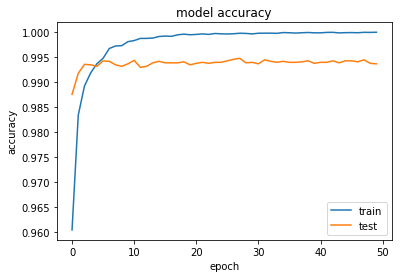

 9888/10000 [============================>.] - ETA: 0sMLP size:  1028  | Learning rate:  0.001  | Training set: normal
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 92s - loss: 0.1102 - acc: 0.9666 - val_loss: 0.0399 - val_acc: 0.9871
Epoch 2/50
60000/60000 [==============================] - 90s - loss: 0.0485 - acc: 0.9844 - val_loss: 0.0290 - val_acc: 0.9912
Epoch 3/50
60000/60000 [==============================] - 90s - loss: 0.0383 - acc: 0.9875 - val_loss: 0.0413 - val_acc: 0.9876
Epoch 4/50
60000/60000 [==============================] - 90s - loss: 0.0263 - acc: 0.9917 - val_loss: 0.0272 - val_acc: 0.9914
Epoch 5/50
60000/60000 [==============================] - 90s - loss: 0.0220 - acc: 0.9927 - val_loss: 0.0221 - val_acc: 0.9928
Epoch 6/50
60000/60000 [==============================] - 90s - loss: 0.0162 - acc: 0.9945 - val_loss: 0.0220 - val_acc: 0.9934
Epoch 7/50
60000/60000 [==============================] - 90s -

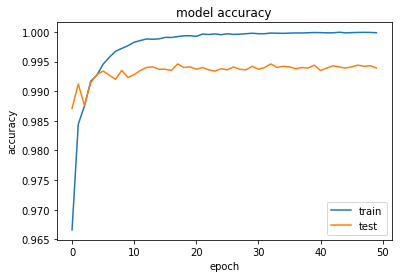

 9888/10000 [============================>.] - ETA: 0sMLP size:  1028  | Learning rate:  0.001  | Training set: centered
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 92s - loss: 0.1138 - acc: 0.9643 - val_loss: 0.0576 - val_acc: 0.9826
Epoch 2/50
60000/60000 [==============================] - 90s - loss: 0.0533 - acc: 0.9836 - val_loss: 0.0317 - val_acc: 0.9898
Epoch 3/50
60000/60000 [==============================] - 90s - loss: 0.0369 - acc: 0.9878 - val_loss: 0.0301 - val_acc: 0.9901
Epoch 4/50
60000/60000 [==============================] - 90s - loss: 0.0267 - acc: 0.9916 - val_loss: 0.0245 - val_acc: 0.9921
Epoch 5/50
60000/60000 [==============================] - 90s - loss: 0.0226 - acc: 0.9927 - val_loss: 0.0290 - val_acc: 0.9905
Epoch 6/50
60000/60000 [==============================] - 90s - loss: 0.0177 - acc: 0.9943 - val_loss: 0.0259 - val_acc: 0.9922
Epoch 7/50
60000/60000 [==============================] - 90s

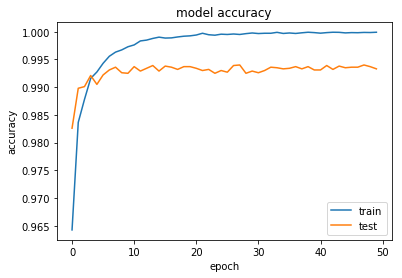

 9888/10000 [============================>.] - ETA: 0s{'model10280.001centered': [0.029414778733592516, 0.99329999999999996]}


In [55]:
for mlp in mlps:
    for learning_rate in learning_rates:
        for _set in range(len(training_sets)):
            test_set = test_sets[_set]
            train_set = training_sets[_set]
            training_set_name = training_set_names[_set]
    
            print("MLP size: ", mlp, " | Learning rate: ", learning_rate, " | Training set:", training_set_name)
            
            model = Sequential()
            model.add(Conv2D(32, kernel_size=(3,3), strides=1, input_shape = (28,28,1)))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(MaxPool2D(pool_size=2))
            model.add(Conv2D(64, kernel_size=(3,3), strides=1))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(MaxPool2D(pool_size=2))
            model.add(Flatten())
            model.add(Dense(mlp))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(Dropout(.5))
            model.add(Dense(10,activation="softmax"))

            epochs = 50
            lr = learning_rate
            decay = lr/sqrt(epochs)
            optimizer = Adam(lr=lr, decay=decay)

            model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

            history = model.fit(train_set, y_train, batch_size=32, 
                      verbose=1, epochs=epochs, validation_data=(test_set, y_test))

            plt.plot(history.history['acc'])
            plt.plot(history.history['val_acc'])
            plt.title('model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='best')
            plt.show()
            
            score, acc = model.evaluate(test_set, y_test)
            
            accuracy = []
            accracy.append(["model | "+str(mlp)+" | "+str(learning_rate)+" | "+str(training_set_name)]
            
print(scores)

In [56]:
print(scores)

{'model10280.001centered': [0.029414778733592516, 0.99329999999999996]}
